### College of Computing and Informatics, Drexel University
### INFO 213: Data Science Programming II
---

## Final Project Report

## Project Title: Default Payment of Credit Card Clients

## Student: Nikita K Patel

#### Date: 09/02/2019
---

### Abstract
---
Lending is one of the key business areas in thebanking industry, credit cards as of late have seen huge successover the course of years. In pursuit to increase their marketshare,banks often issue credit cards to ineligible customerswithout adequate background checks. Also, many customersused their credit card beyond their repayment capabilitiesleading to high debt accumulation. Identifying the risky andnon-risky customers is the biggest challenge for banks. So, theproblem we are trying to analyze is how to identify the risky andnon-risky customers, helping the bank to decide if a customerhas the potential to repay the used credit of the bank

### 1. Intorduction
---
The banks with the invent of credit card are more focused on increasing  the number of clients using their credit service. In the process of increasing the number of clients the bank neglects that there are client's who are not being able to pay back the credit in time. This became an issue that lead bank to effectively decide the credit limit to be allowed to a person. 
The motivation of the project is to provide any banking organizations to ﬁnd a simple and an effective predictive model for the banks to determine if their customers could make the credit card payments on-time. Based on the previous credit history, and various parameters such as sex, age , level of education along with customer details and the credit history of the past 6 months, we will provide predictive model to give a reliable and effective prediction if a customer is able to pay the credit for the next(7th) month.   

### 2. Problem Definition
---
A Taiwan-based credit card issuer wants to better predict the likelihood of default for its customers, as well as identify the key drivers that determine this likelihood. This would inform the issuer’s decisions on who to give a credit card to and what credit limit to provide. It would also help the issuer have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers. Important Problem statement in this business case is, how does the probability of default payment vary by categories of different demographic variables, and which variables are the strongest predictors of default payment?

### 3. Data Sets
---
The original dataset comes from 'UCI Machine Learning Repository, Center of Machine Learning and Intelligent System'. Later on Kaggle this dataset was updated by few data scientist based on their analysis to improve the results of algorithms used for making predictions. The data was extracted from the UCI Machine learningRepository, the ﬁle extracted was in the CSV format. The credit card issuer has gathered information on 30000 customers. The dataset contains information on 24 variables, including demographic factors, credit data, history of payment, and bill statements of credit card customers from April 2005 to September 2005, as well as information on the outcome: did the customer default or not? The data was analyzed and concluded that only certain attributes contribute towards the class values which was processed in the later stages of the project.

**To default is to fail to make a payment on a debt by the due date. If this happens with a credit card, creditors might raise interest rates to the default (or penalty rate) or decrease the line of credit. In case of serious delinquency, the card issuer can even take legal action to enforce payment or to garnish wages. Therefore in this dataset, attribute 'default.next.month' that has 0 and 1 value, here 0 = No means 'No Defaulters' and 1 = Yes means 'Defaulters'**

### 4. Preparation
---

In [1]:
import pandas as pd
import numpy as np 
import io
import re
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 40
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(40, 30))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [3]:
df = pd.read_csv("/Users/nikki/Desktop/SQ-19/INFO-213/Project/UCI_Credit_Card.csv")

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
#Provides the number of rows and columns. The dataframe has 
#30000 rows and 25 columns.

df.shape

(30000, 25)

In [6]:
#Provides descriptive statistics 

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients and there are 25 different features.

The mean value for the amount of credit card limit is approximately 167,484.32. The standard deviation is unusually large, max value being 1000000(1M).
Clients gender is either Male or Female. 
Education level is mostly graduate school and university.
Most of the clients are either married or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.22, minimum age is 21 and maximum is 79.

The response variable(dependent) is 'default.payment.next.month.' This indicates if a client will default payment next month. The value 0 for default payment means not default and value 1 means default. The mean of 0.2212 means that there are 22.12% of credit card contracts that will default next month

In [7]:
#Provides the types of data across columns.

df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
#Provides the amount of nulls present in the data.
#More than 80% of the 'HDI for year' column is null.

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
#No duplicates in the data.

df.duplicated().sum() 

0

In [10]:
df.SEX.var()

0.23924737046804792

In [11]:
df.SEX.mean()

1.6037333333333332

In [12]:
df.SEX.median()

2.0

In [13]:
df.SEX.mode()

0    2
dtype: int64

In [14]:
df.EDUCATION.var()

0.6246510039224985

In [15]:
df.EDUCATION.mean()

1.8531333333333333

In [16]:
df.EDUCATION.median()

2.0

In [17]:
df.EDUCATION.mode()

0    2
dtype: int64

In [18]:
df.MARRIAGE.var()

0.2724522639642553

In [19]:
df.MARRIAGE.mean()

1.5518666666666667

In [20]:
df.MARRIAGE.median()

2.0

In [21]:
df.MARRIAGE.mode()

0    2
dtype: int64

In [22]:
df.AGE.var()

84.96975540851355

In [23]:
df.AGE.mean()

35.4855

In [24]:
df.AGE.median()

34.0

In [25]:
df.AGE.mode()

0    29
dtype: int64

In [26]:
df['default.payment.next.month'].var()

0.17227630254344614

In [27]:
df['default.payment.next.month'].mean()

0.2212

In [28]:
df['default.payment.next.month'].median()

0.0

In [29]:
df['default.payment.next.month'].mode()

0    0
dtype: int64

In [30]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [31]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [32]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [33]:
#Provides the number of distinct observations for each column.

df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [34]:
#Displays the unique education groups represented in the dataframe.

sorted(df.EDUCATION.unique())

[0, 1, 2, 3, 4, 5, 6]

In [35]:
#Displays the unique age groups represented in the dataframe.

print(sorted(df.AGE.unique()))

[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]


In [36]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

In [37]:
df['default.payment.next.month'].unique()

array([1, 0])

In [38]:
df.PAY_0.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [39]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.AGE, bins, labels = labels,include_lowest = True)


In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,age_group
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-29
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-29
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59


In [41]:
df.age_group.unique()

[18-29, 30-39, 50-59, 40-49, 60-69, 70-79]
Categories (6, object): [18-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79]

In [42]:
df['EDUCATION'].replace(0, 4,inplace=True)
df['EDUCATION'].replace(5, 4,inplace=True)
df['EDUCATION'].replace(6, 4,inplace=True)
sorted(df.EDUCATION.unique())

[1, 2, 3, 4]

In [43]:
#renaming PAY_O = PAY_1, to make it equivalent with BILL_AMT1 and PAY_AMT1
df = df.rename(columns={'PAY_0': 'PAY_1', 
                        'default.payment.next.month': 'DEFAULT'})

In [44]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'age_group'],
      dtype='object')

### 5. Exploration and Visualization
---

In [45]:
# I am interested in having a general idea of the default probability
df.DEFAULT.sum() / len(df.DEFAULT)

0.2212

### Explanation
As the dataset is aimed at case of customer's defualt payment (a response variable), it is important to see how other important features are related to Default. 

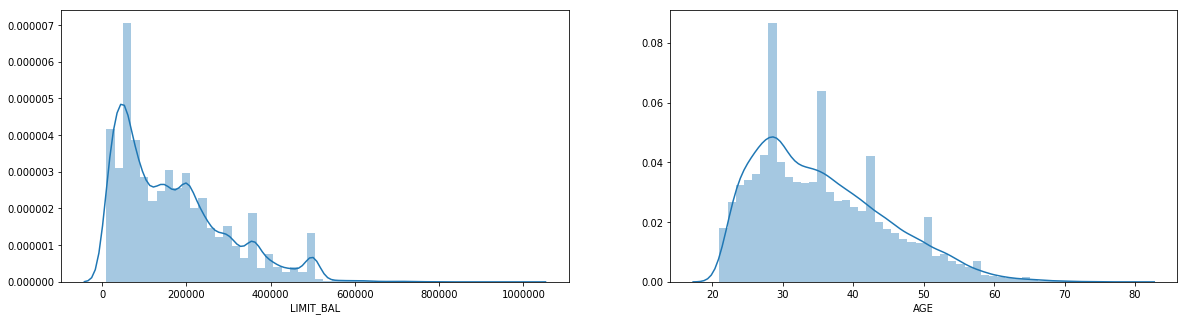

In [46]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

**Observation:**
From the above graph it is observed that dataset consists of skewed data of limiting balance and age of clients.
We have more number of clients having limiting balance between 0 to 200000 currency.
We have more number of clients from age bracket of 20 to 40, i.e., clients from mostly young to mid aged groups

In [47]:
# 1 = Male, 2 = Female
# more female than male

df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

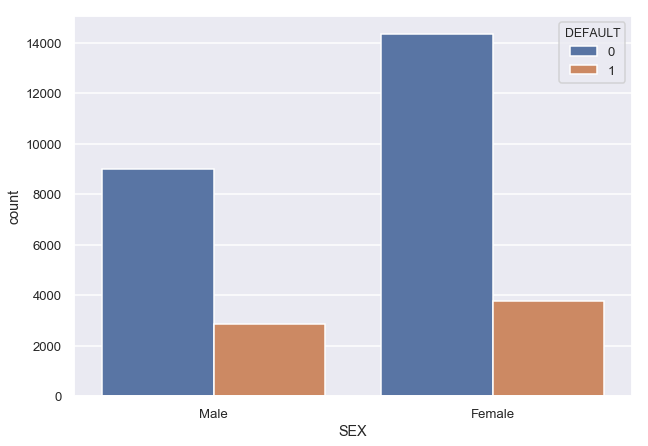

In [48]:
# Default payment (1=yes, 0=no)

sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.8)
sex = sns.countplot(x='SEX', hue='DEFAULT', data=df)
sex.set_xticklabels(['Male', 'Female'])
plt.show()

In [49]:
#EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 4 = others)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

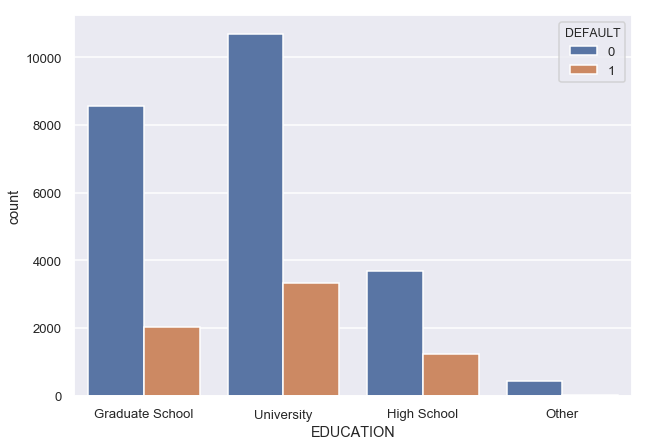

In [50]:
# Default payment (1=yes, 0=no)

sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.8)

education = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
education.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

**Observation:**
The above graph shows, we have maximum clients from Universities followed by Graduate school.
The graph helps to analyze that with the increasing work-load the number of clients that will be defaulters (clients who will not make paymetn) is also increasing.
So it can be concluded that Education is important feature to predict the default payment for next month.

In [51]:
## Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

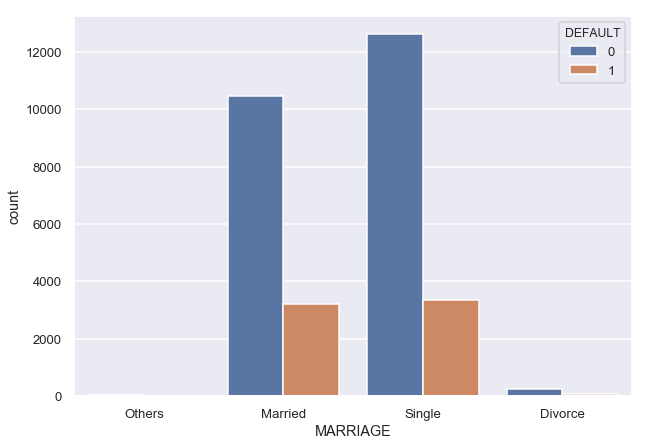

In [52]:
# Default payment (1=yes, 0=no)

sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.8)

marriage = sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df)
marriage.set_xticklabels(['Others', 'Married', 'Single', 'Divorce'])
plt.show()

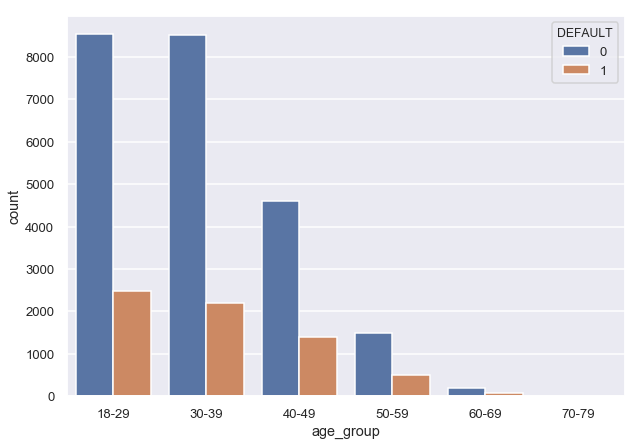

In [53]:
#age_group [18-29, 30-39, 50-59, 40-49, 60-69, 70-79]
# Default payment (1=yes, 0=no)

sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.8)

sns.countplot(x='age_group', hue='DEFAULT', data=df)
plt.show()

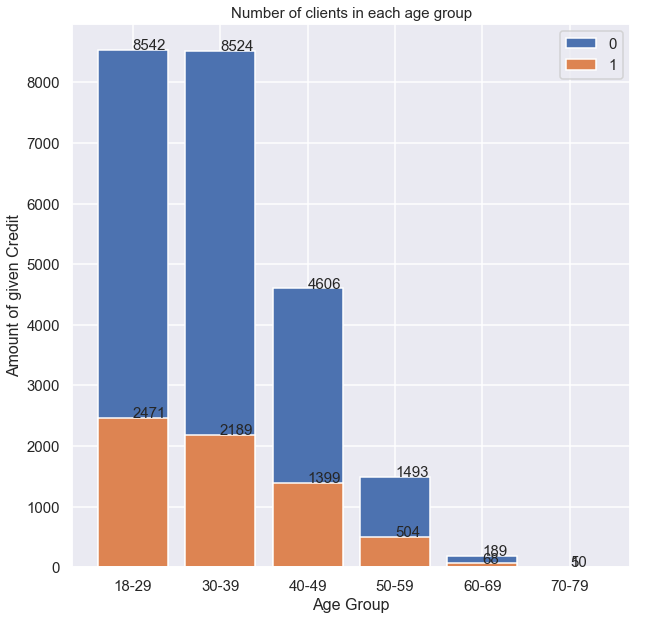

In [54]:
age_group_count = df.age_group.value_counts()
AGE_0 = (df.age_group[df['DEFAULT'] == 0].value_counts())
AGE_1 = (df.age_group[df['DEFAULT'] == 1].value_counts())

plt.subplots(figsize=(10,10))
plt.bar(AGE_0.index, AGE_0.values, label='0')
plt.bar(AGE_1.index, AGE_1.values, label='1')
for x,y in zip(labels,AGE_0):
    plt.text(x,y,y,fontsize=15)
for x,y in zip(labels,AGE_1):
    plt.text(x,y,y,fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Amount of given Credit', fontsize=16)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

**Observation:**
The above two graph shows, we have maximum clients from 18-29 age group followed by 30-39. The graph helps to analyze that with increasing age group the number of clients that will default the payment next month is decreasing. So it can be concluded that Age is important feature to predict the default payment for next month.

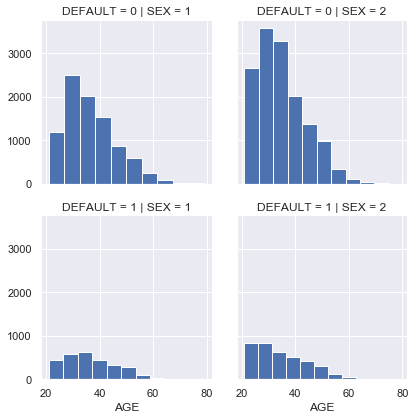

In [55]:
# Sex (1=Male, 2=Female)
g = sns.set(rc={'figure.figsize':(10,10)})
g = sns.FacetGrid(df, row='DEFAULT', col='SEX')
g = g.map(plt.hist, 'AGE')

**Observation:**
It can be seen that females of age group 20-30 have high tendency to default payment compared to males in all age brackets. So it can be concluded that SEX is important feature to predict probability of defaulting payment.


In [56]:
df.PAY_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

#### Details:
PAY_1: Repayment status in September, 2005

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)


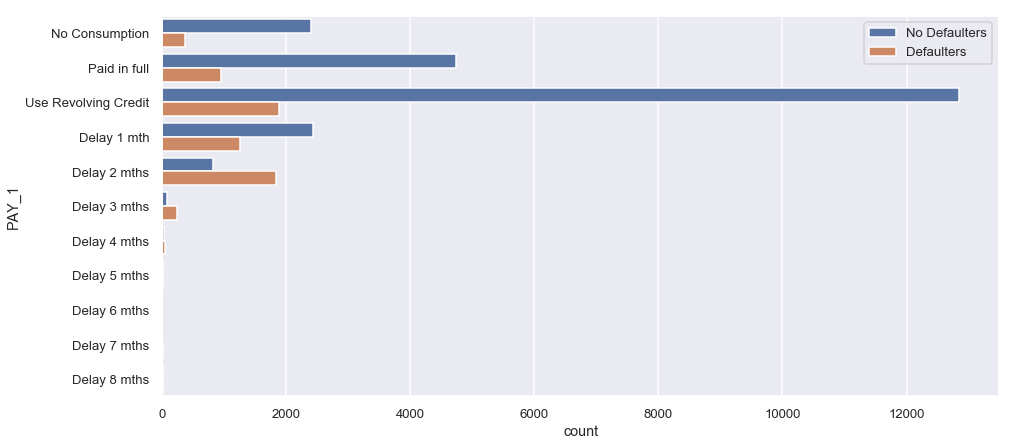

In [57]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_context("talk", font_scale=0.8)

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=df)
pay1.set_yticklabels(['No Consumption','Paid in full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
plt.legend(labels=['No Defaulters','Defaulters'])
plt.show()

**Observation:**
It can be seen that clients using revolving credit to pay the amount have high tendency to no default payment compared to 
clients who make full payment on time or delayed by one month. So we can say Repayment status will be one of the
important feature to predict default payment for next month. 


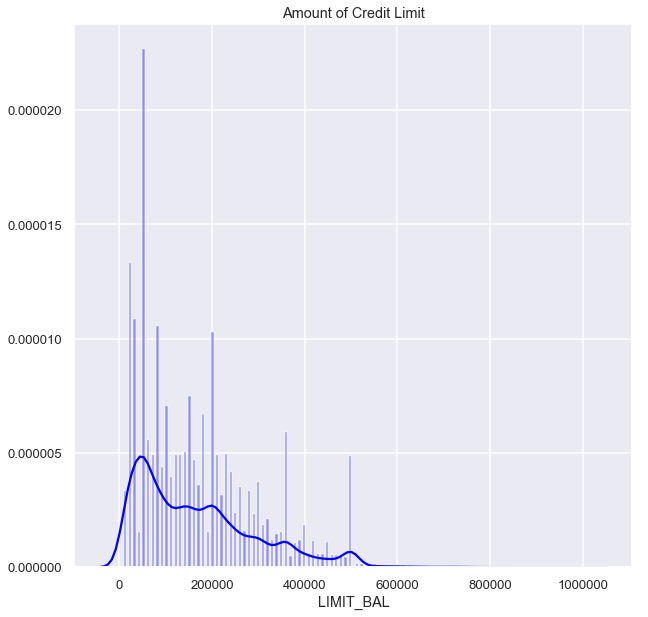

In [63]:
plt.figure(figsize = (10,10))
plt.title('Amount of Credit Limit')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K

In [ ]:
DEFAULT_LIMIT_0 = df[df['DEFAULT'] == 0]["LIMIT_BAL"]
DEFAULT_LIMIT_1 = df[df['DEFAULT'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (10,10))
plt.title('Default amount of credit limit - by Payment Next Month')
sns.set_color_codes("pastel")
sns.distplot(DEFAULT_LIMIT_1,kde=True,bins=200, color="green", label='Defaulters')
sns.distplot(DEFAULT_LIMIT_0,kde=True,bins=200, color="red", label='No Defaultes')
plt.legend()
plt.show()

**Observation:**
From this graph it is observed that clients who are defaulters has the low credit limit compared to clients who are not defaulters . That is  most of defaults are for credit limits 0-100,000 (this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000. Hence, we can use 'LIMIT_BAL" feature to predict if client will do default payment for next month.

In [ ]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

The scatter plot demonstrates that there is higher proportion of clients for whom the bill amount is high but the amount paid against the it is comparatively very low. This we can assume since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis

In [ ]:
DEFAULT_COUNT = (df.DEFAULT.value_counts(normalize=True)*100)
DEFAULT_COUNT.plot.bar(figsize=(10,10))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],DEFAULT_COUNT):
    plt.text(x,y,y,fontsize=12)
plt.show()

**Observation:**
From above graph it can be analyzed that the dataset consists of 77% clients are not expected to default  
whereas 22% clients are expected to default.


In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#saleprice correlation matrix
n = 10 #number of variables for heatmap
correlation_matrix = df.corr()
cols = correlation_matrix.nlargest(n, 'DEFAULT')['DEFAULT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
heat_map = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Observation:**
From the above graph it can be seen that next month default prediction is dependent on repayment status of past 
six months of all the features given to us. But there is multicollinearity between the Repayment Status features.


### 6. Modeling and Evaluation
---

### Reason for using Confusion Matrix: 
A confusion matrix is a summary of prediction results on a classification problem.. Calculating a confusion matrix can give us a better idea of what our classification model is getting right and what types of errors it is making.

**Precision:** It answers the question - “When it predicts the positive result, how often is it correct?” Precision is usually used when the goal is to limit the number of false positives (FP).

**Recall:** It answers the question - “When it is actually the positive result, how often does it predict correctly?” It is the capability of the model to predict the positive results. Useful as it maybe, it is still not adequate to describe the error behaviour of model. Recall is usually used when the goal is to limit the number of false negatives (FN).

**High recall, low precision:** This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

**Low recall, high precision:** This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

**F1 Score:** The F1 score (also F-score or F-measure) is a measure of a test’s accuracy. It considers both the precision p and the recall r of the test to compute the score, i.e it is a harmonic mean of precision and recall.

**AUC Score:** It answers the question - 'How often is our model correct?", meaning as ability to get correct classification, follows a simple and obvious relationship.

### 6.1 Logistic Regression

**Including all independent features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.iloc[:, 1:-2]
y = df.DEFAULT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)
score_1 = accuracy_score(y_pred,y_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print( '\nAccuracy Score for model_1: ', "accuracy=%.2f%%" % (score_1 * 100))

**Excluding unimportant independent features**

In [ ]:
X = df[['SEX', 'EDUCATION','MARRIAGE','AGE','BILL_AMT1','PAY_1', 'PAY_AMT1']]
y = df.DEFAULT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)
score_2 = accuracy_score(y_pred,y_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print( '\nAccuracy Score for model_1: ', "accuracy=%.2f%%" % (score_2 * 100))

**Analysis on LR:** 
In Logistic Regression even after excluding unimportant features, AUC score does not increases or decreases. 

**Advantage of LR:**
Outputs have a nice probabilistic interpretation, and the algorithm can be regularized to avoid over fitting.Logistic models can be updated easily with new data using stochastic gradient descent.Logistic regression is more robust because the independent variables and Dependent variable don’t have to be normally distributed, or have equal variance in each group. It does not assume a linear relationship between the Independent Variable and Dependent Variable, it can handle nonlinear effects. 

**Disadvantage of LR**
The advantages of logistic regression come at a cost, it requires much more data to achieve stable, meaningful results. Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships.With standard regression, and Data Analysis, typically 20 data points per predictor is considered the lower bound. For logistic regression, at least 50 data points per predictor is necessary to achieve stable results.

### 6.2 KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Including all independent features

In [ ]:
X = df.iloc[:, 1:-2]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
knn_1 = KNeighborsClassifier(n_neighbors  = 5)
knn_1.fit(X_train, y_train)

In [ ]:
y_pred = knn_1.predict(X_test)

In [ ]:
print("The classification accuracy: ", sum(y_test == y_pred)/len(y_test) * 100)

In [ ]:
tp = sum((y_test == 0) & (y_pred == 0))

fn = sum((y_test == 0) & (y_pred != 0))

fp= sum((y_test  != 0) & (y_pred == 0))

tn = sum((y_test != 0) & (y_pred != 0))

print("recall for class 0 = " + str(tp / (tp + fn)))
print("precision for class 0 = " + str(tp / (tp + fp)))
print("F1 Score for class 0 = " + str(2 * tp /(2 * tp + fp + fn)))

In [ ]:
tp = sum((y_test == 1) & (y_pred == 1))

fn = sum((y_test == 1) & (y_pred != 1))

fp = sum((y_test  != 1) & (y_pred == 1))

tn = sum((y_test !=1) & (y_pred != 1))

print("recall for class 1 = " + str(tp / (tp + fn)))
print("precision for class 1 = " + str(tp / (tp + fp)))
print("F1 Score for class 1 = " + str(2 * tp /(2 * tp + fp + fn)))

In [ ]:
# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

from sklearn.metrics import accuracy_score
score_knn_1 = accuracy_score(y_pred,y_test)
print('accuracy is', "accuracy=%.2f%%" % (score_knn_1 * 100))

**Excluding unimportant independent features**

In [ ]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE','AGE','BILL_AMT1','PAY_1', 'PAY_AMT1']]
y = df.DEFAULT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn_2 = KNeighborsClassifier(n_neighbors  = 5)
knn_2.fit(X_train, y_train)

In [ ]:
y_pred = knn_2.predict(X_test)

In [ ]:
score_knn_2 = accuracy_score(y_pred,y_test)
print('accuracy is', "accuracy=%.2f%%" % (score_knn_2 * 100))

In [ ]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is', "accuracy=%.2f%%" % (score_knn_2 * 100))

**Analysis on KNN:** 
We can see that by removing the unimportant and multicollinear data, the accuracy has marginally decreased by 1.06%

**Advantage:**  KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training.

**Disadvantage:** Does not work well with large dataset, in large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm. Does not work well with high dimensions, the KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. Need feature scaling, that iw We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

### 6.3 Decision Tree

#### Including all independent features

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, 1:-2]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier_1 = DecisionTreeClassifier(max_depth=10, random_state=14) 
classifier_1.fit(X_train, y_train)

y_pred = classifier_1.predict(X_test)
score_CART_1 = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', "accuracy=%.2f%%" % (score_CART_1* 100))

**Excluding unimportant independent features**

In [ ]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE','AGE','BILL_AMT1','PAY_1']]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier_2 = DecisionTreeClassifier(max_depth=10, random_state=14) 
classifier_2.fit(X_train, y_train)

y_pred = classifier_2.predict(X_test)
score_CART_2 = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', "accuracy=%.2f%%" % (score_CART_2* 100))


**Analysis on Decision Tree:** 
We got a +0.25% in accuracy just by choosing the right features.

**Advantage:** 
The Tree is very easy to use and imagine. Decision Trees can be applied for both Numerical and Categorical independent variables, it efficiently handles missing values, it help with the probability & payoffs of decisions - Information Gain. In this model, Linearity between independent and dependent variable is not a constraint for prediction.
The internal workings are capable of being observed and thus make it possible to reproduce work. Factors/Feature selection is a byproduct of Decision Trees. Thus this model is fast

**Disadvantage:** Decision-tree learners can create over-complex trees that do not generalize the data well, so it is easy to fall into the trap of overfitting (i.e. creating a very complex model that perfectly describes your training set but fails in predicting). It is also said to be senstive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.
There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be.

### 6.4 Naive Bayes Classifier

**Including all independent features**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.iloc[:, 1:-2]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_NB_1 = GaussianNB()
model_NB_1.fit(X_train, y_train)
pred = model_NB_1.predict(X_test)
score_NB_1 = accuracy_score(pred,y_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('accuracy is', "accuracy=%.2f%%" % (score_NB_1 * 100))

**Excluding unimportant independent features**

In [ ]:
X = df[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE','AGE','BILL_AMT1','PAY_1']]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model_NB_2 = GaussianNB()
model_NB_2.fit(X_train, y_train)
pred = model_NB_2.predict(X_test)
score_NB_2 = accuracy_score(pred,y_test)

print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('accuracy is', "accuracy=%.2f%%" %(score_NB_2 * 100))

**Analysis on Naive Bayes Classification:** Surprisingly We got a +39.97% in accuracy just by focusing on some important features.

**Advantage:** Since the predictions of Naive Bayes algorithms are based on the posterior probability of each conditional feature, it is easy to understand which features are influencing the predictions. This helps users to understand the predictions. Since all the probabilities are pre-computed in the Naive Bayes algorithm, the prediction time of this algorithm is very efficient.

**Disadvantage:** The first disadvantage is that the Naive Bayes classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class. Due to this, the result can be (potentially) very bad - hence, a “naive” classifier.Another problem happens due to data scarcity. For any possible value of a feature, we need to estimate a likelihood value by a frequentist approach. This can result in probabilities going towards 0 or 1, which in turn leads to numerical instabilities and worse results. As we can see from AUC score for model_NB_1 (38.15%) and model_NB_2 (78.12%)

### 6.5 Random Forest Classification

**Including all independent features**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, 1:-2]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

model_RFC_1 = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_RFC_1.fit(X_train, y_train)
y_pred = model_RFC_1.predict(X_test)
score_RFC_1 = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', "accuracy=%.2f%%" % (score_RFC_1 * 100))

**Excluding unimportant independent features**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df[['LIMIT_BAL', 'SEX', 'EDUCATION','MARRIAGE','AGE','BILL_AMT1','PAY_1']]
y = df.DEFAULT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

model_RFC_2 = RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_RFC_2.fit(X_train, y_train)
y_pred = model_RFC_2.predict(X_test)
score_RFC_2 = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', "accuracy=%.2f%%" % (score_RFC_2 * 100))

**Analysis on Random Forest:** 
We can see that by removing the unimportant and multicollinear data, the accuracy has marginally decreased by 2.36%

**Advantage:** Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy. As compared to Decision Tree AUC score for all features, Random Tree classification is giving us a better score. In large dataset with many features, this classification can be really helpful if a user is unaware of important independent features. Random Forest can automatically handle missing values, no feature scaling (standardization and normalization) is required in case of Random Forest as it uses rule based approach instead of distance calculation. Handles non-linear parameters efficiently: Non linear parameters don't affect the performance of a Random Forest unlike curve based algorithms. So, if there is high non-linearity between the independent variables, Random Forest may outperform as compared to other curve based algorithms.

**Disadvantage:** Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. On the other hand decision tree is simple and does not require so much computational resources.Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.

In [ ]:
models = ['LR', 'KNN', 'CART', 'NB', 'RFC']

### Comparision of AUC Score of Classifications for all independent variables

In [ ]:
accuracies = []
accuracies.append(score_1)
accuracies.append(score_knn_1)
accuracies.append(score_CART_1)
accuracies.append(score_NB_1)
accuracies.append(score_RFC_1)

In [ ]:
accuracies

In [ ]:
plt.bar(models, accuracies, align='center', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Accuracy Score of Classifiers')
plt.title('Algorithim Comparision for all independent features')
plt.show()

### Comparision of AUC Score of Classifications for few important independent variables

In [ ]:
accuracies_2 = []
accuracies_2.append(score_2)
accuracies_2.append(score_knn_2)
accuracies_2.append(score_CART_2)
accuracies_2.append(score_NB_2)
accuracies_2.append(score_RFC_2)

In [ ]:
plt.bar(models, accuracies_2, align='center', alpha=0.5)
plt.xlabel('Classification')
plt.ylabel('Accuracy Score of Classifiers')
plt.title('Algorithim Comparision for few important independent features')
plt.show()

**Model Selection:** Comparing the AUC Scores of all classifications, we have analyzed 'Decision Tree' and 'Random Forest' can be the best fit for our dataset. Further only one model, **'Decision Tree'** has been chosen based on high precision and high recall.

### How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used?
The performance of the algorithms is evaluated through following performance metrics: accuracy, precision and recall. This approach could improve and ease the process of credit card default, and therefore help the banking system in decision making. The selected model would help the issuer (interested parties) have a better understanding of their current and potential customers, which would inform their future strategy, including their planning of offering targeted credit products to their customers. This would also inform the issuer’s (interested parties) decisions on who to give a credit card to and what credit limit to provide.

### What other data should be collected?
For further researches bigger data set from more than one country and more attributes including macroeconomic indicators can be collected.
### How often would the model need to be updated?
The research was done for only one data set from 2005 year and from only one country. The model needs to be updated as soon as the data is updated.

### 7. Conclusion
---
#### EDA Conclusion:
From the data provided we see that we want to predict whether a person will default in next month or not. 
 This prediction depends mostly on previous repayment history, and few factors such as the Sex, Education, Marriage, Age and Limiting Balance. The visualization helped us to find relationship between important features and target variable, that is 'default.payment.next.month' With the help of observations now we can tell how a particular feature will help us to predict whether clients will default for next month or not with the help of different Machine Learning methods. Since our target variable is discrete (1,0) we plan to use KNN classification, Naïve Bayes Classifier, Decision tree, Random Forests and Logistic Regression to predict the 'default.payment.next.month' and we will compare the accuracy of these methods to conclude which method fits the most to our dataset.
 
#### Modelling and Evaluation Conclusion: 
   The whole exercise analyzes the performance of various algorithms to calculate the risk of person being defaulting the credit card payment. The performance of algorithms aremeasured using various metrics. Detecting credit card fraud(default) is a tricky problem in terms of business perspective. To catch maximum defaulters (True Positives) and minimize(False Positives) without hurting the sentiments of the customers. Model selection solely based on accuracy does not make much sense because the data-set is unbalanced and skewed. Therefore sensitivity or recall (True Positive Rate) along with precision of the model is of importance. High recall means more defaulters being caught. And reasonably high precision means less False Positives. A good model is a balance between high recall and reasonable high precision.So F-Measure along with Precision and Recall are the metrics we are actually looking for.


### 8. References
---
Default of Credit Card Clients Dataset, Default Payments of Credit Card Clients in Taiwan from 2005
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.